1. Fashion-MNIST 데이터 사용
2. Convolution Layer 2번이상 사용
3. 그 외 Pooling, activation function 사용
4. LeNet, AlexNet 등 기존 네트워크 활용가능

   vgg16 같이 tf.keras.applications에 있는 모델도 활용가능(weight = none)
5. Data Agumentation 을 한 개 이상 적용할 것
6. 예측직전 layer에 Dropout 적용해보기(0.2)
7. (선택)Sequential Model 말고 tf.keras.Model 활용해보기.
8. 위에 언급되지 않은 내용 모두 자유(input shape, batch size, epoch등)


1. Fasion Mnist 데이터 불러오기.

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np

In [44]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [45]:
x_train,x_test = x_train/255.0,x_test/255.0

In [46]:
x_train.shape

(60000, 28, 28)

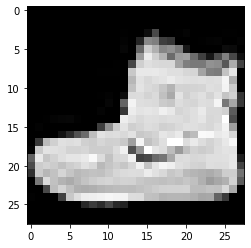

In [47]:
plt.imshow(x_train[0],cmap='gray')

In [60]:
x_train=x_train[...,tf.newaxis]

SyntaxError: ignored

In [61]:
x_test=x_test[...,tf.newaxis]

In [62]:
x_train.shape 

(60000, 28, 28, 1)

In [53]:
data_preprocessing = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((32,32)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./225.0),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
])

In [54]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,(2,2), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32,(2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64,(2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax')
])

In [55]:
model.build()

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 64)          8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6474 - accuracy: 0.7616
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4335 - accuracy: 0.8397
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3796 - accuracy: 0.8589
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3469 - accuracy: 0.8708
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3240 - accuracy: 0.8779


In [63]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8698


[0.34561002254486084, 0.8697999715805054]

* preprocessing 과정에서 겪는 shape 문제 
> 1) 분석하고자 하는 data가 칼라인지 흑백인지 확인해야한다.
  (칼라면 32,32,3 ) (흑백이면 28,28)
  tf.keras.layers의 구조는
  [batchsize,horizon,weight,chanel] 
  칼라면 그대로 들어가도 문제없으나
  흑백이라면 tf.newaxis 로 3차원모양으로 맞춰줘야한다.

* preprocessing
> fashion_mnist 가 28,28 이여서 
reshape를 32,32 로, rescale, flip,randomRatate 로 agumentation

* conv2d의 채널수는 2의 제곱수로 늘려야만함
( 16,32,64 ...)

* flatten 을 하고 모델 갯수를 본다.
그 다음 절반정도로 줄이고 최조아웃풋을 내주도록 설계.

* tf.keras.model 사용시
> 1) input, output 을 새로정의를 해줘야한다.


